# Homework 1
Dr. Kerby </br>
Katherine Wilsdon </br> </br>
Applied Neural Networks

**Question 1**</br>
Import the MNIST Digits Dataset as shown in class. Split the dataset into training (60k) and testing (10k) image sets. Take as many cells as you need.

In [0]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Download MNIST digits
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

In [5]:
# Set X and y
X, y = mnist['data'], mnist['target']
print(f'Shape of X: {X.shape} Shape of y: {y.shape}')

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(f'Shape of X_train: {X_train.shape} Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape} Shape of y_test: {y_test.shape}')

Shape of X: (70000, 784) Shape of y: (70000,)
Shape of X_train: (60000, 784) Shape of X_test: (10000, 784)
Shape of y_train: (60000,) Shape of y_test: (10000,)


**Question 2**</br>
Perform PCA and then Logistic Regression on the unscaled dataset at 15 different %-variance-preserved levels. Record the number of components at each variance level, and record the accuracy of each. </br>
*Hint: Might be easiest to store the variance %, # components, and accuracy, in separate lists (or a multi-dimensional list) for use in plotting later.*

In [11]:
# PCA and Logistic Regression on the unscaled dataset
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

variance = []
components = []
training_scores = []
testing_scores = []

for i in range(5,100,6):
  variance.append(i)
  pca = PCA(n_components=i*0.01)
  pca.fit(X_train)

  components.append(pca.n_components_)

  # Apply PCA model to training and testing sets
  X_train_PCA = pca.transform(X_train)
  X_test_PCA = pca.transform(X_test)

  # Create an instance of the model
  logregPCA = LogisticRegression(solver='lbfgs',n_jobs=-1, max_iter=1000) 
  logregPCA.fit(X_train_PCA, y_train)

  training_scores.append(logregPCA.score(X_train_PCA,y_train))
  testing_scores.append(logregPCA.score(X_test_PCA,y_test))

print(f'Variance: {variance}')
print(f'Components: {components}')
print(f'Training scores: {training_scores}')
print(f'Testing scores: {testing_scores}')

Variance: [5, 11, 17, 23, 29, 35, 41, 47, 53, 59, 65, 71, 77, 83, 89, 95]
Components: [1, 2, 3, 4, 5, 6, 8, 10, 13, 16, 21, 28, 37, 52, 80, 154]
Training scores: [0.3052166666666667, 0.44248333333333334, 0.46286666666666665, 0.5702666666666667, 0.67475, 0.7327666666666667, 0.7832833333333333, 0.8025833333333333, 0.8314833333333334, 0.8524333333333334, 0.8757833333333334, 0.8890833333333333, 0.8991, 0.9085833333333333, 0.91805, 0.9267833333333333]
Testing scores: [0.3105, 0.445, 0.4774, 0.5757, 0.6876, 0.7368, 0.7911, 0.8086, 0.8384, 0.8574, 0.8821, 0.8943, 0.9043, 0.9128, 0.9177, 0.9233]


**Question 3**</br>
Plot your results. Use the number of components/features as the x-axis and the %-variance and accuracy as the y-axis. You may plot two plots. Or if you wish to be fancy, put it on one plot with a secondary y-axis. :) 

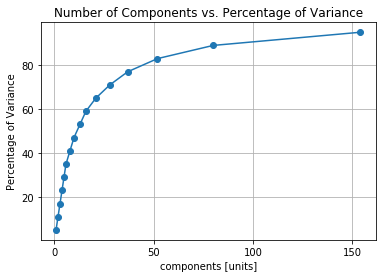

In [12]:
plt.plot(components, variance, '-o')
plt.xlabel('components [units]')
plt.ylabel('Percentage of Variance')
plt.title('Number of Components vs. Percentage of Variance')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.grid()
plt.show()

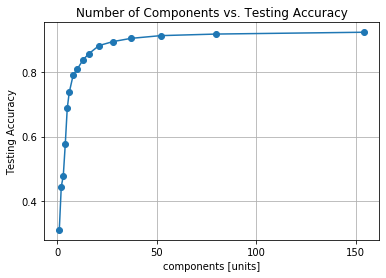

In [14]:
plt.plot(components, testing_scores, '-o')
plt.xlabel('components [units]')
plt.ylabel('Testing Accuracy')
plt.title('Number of Components vs. Testing Accuracy')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.grid()
plt.show()

**Question 4**</br>
Comment/analyze your results.

In [30]:
test_score = pd.DataFrame(testing_scores)
component = pd.DataFrame(components)
variances = pd.DataFrame(variance)
print(f'The best testing accuracy of {testing_scores[15]} had the highest number of components at {components[15]} and variance at {variance[15]}%.')
print(f'The worst testing accuracy of {testing_scores[0]} had the lowest number of components at {components[0]} and variance at {variance[0]}%.')
print(f'The means were testing accuracy: {test_score[0].mean()}, components: {component[0].mean()}, and variance: {variances[0].mean()}')
print(f'The medians were testing accuracy: {test_score[0].median()}, components: {component[0].median()}, and variance: {variances[0].median()}')
print('To have over 50 components, the variance must be greater than or equal to 83%.')
print('The test accuracy is the best when the variance is above 80% and the number of components is above 50.')


The best testing accuracy of 0.9233 had the highest number of components at 154 and variance at 95%.
The worst testing accuracy of 0.3105 had the lowest number of components at 1 and variance at 5%.
The means were testing accuracy: 0.7476875, components: 27.5, and variance: 50.0
The medians were testing accuracy: 0.8235, components: 11.5, and variance: 50.0
To have over 50 components, the variance must be greater than or equal to 83%.
The test accuracy is the best when the variance is above 80% and the number of components is above 50.


**Graduate Students Only**</br>
Repeat steps 1-4 but with SCALED data (StandardScaler).